<center>
<img src="logo.png" height="900"> 
</center>


#  Акции

В этом задании мы немного поработаем с ценами на акции. 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

В табличке `prices.tsv` лежат данные о том как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по каждой из ценных бумаг.  Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('price.tsv', sep='\t')

# сделали дату индексом таблицы и применили это преобразование
df_prices.set_index('Date', inplace=True)  
df_prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-02,18.982769,10.030768,51.945328,32.324974,NaN,26.103115,11.17,17.431229,32.489162,29.600000,...,43.086357,28.942909,21.664534,NaN,24.980757,49.945686,27.59,20.329309,NaN,NaN
2010-08-03,18.337280,10.049624,51.148121,32.334858,NaN,25.590956,10.97,17.490696,32.223312,29.120001,...,43.628933,29.177372,21.289482,NaN,24.594522,50.279709,27.40,20.080635,NaN,NaN
2010-08-04,18.633682,9.455699,51.877274,32.464500,NaN,25.915325,10.50,17.553665,32.497211,29.700001,...,43.628933,29.674450,21.488039,NaN,24.808437,50.873531,28.09,20.089518,NaN,NaN
2010-08-05,18.745655,9.088029,52.373096,32.306469,NaN,25.898251,10.26,17.483702,32.199158,29.440001,...,43.621983,29.590042,21.267420,NaN,25.200619,50.567337,30.35,19.636568,NaN,NaN
2010-08-06,18.923494,8.946616,51.284237,32.107712,NaN,25.812889,9.98,17.690086,32.440819,29.230000,...,43.107220,29.599421,21.157112,NaN,25.170906,50.084862,30.24,19.227848,NaN,NaN


In [3]:
df_inf = pd.read_csv('information.tsv', sep='\t')
df_inf.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


> Давайте решим пробную задачку, чтобы вы понимали, как устроена система тестирования. 

В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? Запишите результат в пременную `n_nasdaq`.

In [4]:
n_nasdaq = df_inf['NASDAQ'].sum() # каждое True это 1, а False 0
n_nasdaq

103

Все ваши расчёты будут тестироваться с помощью вот таких тестов. 

In [5]:
assert n_nasdaq == 103

Мы положили в переменную `n_nasdaq` число ценных бумаг, как и требовалось в задании. Тесты прошли и всё успешно отработало. Подобные тесты сделаны по каждому заданию, но скрыты от вас. Вы довольно часто будете видеть ячейки с комментарием: 

In [6]:
# проверка, что задание решено корректно

Он означает, что внутри этой ячейки есть секретные тесты, которые сами запустятся, когда нажмёте на кнопку __Submit assignment.__

__а)__ Теперь настоящее задание. Сколько ценных бумаг входят во все три индекса сразу?

In [7]:
n_sp = len(df_inf[df_inf['DJI'] & df_inf['NASDAQ'] & df_inf['S&P-500']]) # запишите результат в переменную n_sp 

In [8]:
# проверка, что задание решено корректно
assert n_sp < 10

# Подобные тесты скрыты от вас

__б)__ В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [9]:
n_founded = df_inf.query('Founded >= 1800.0 & Founded <= 1899.0')['S&P-500'].sum() # запишите результат в переменную n_founded

In [10]:
# проверка, что задание решено корректно
assert n_founded < 100

# Подобные тесты скрыты от вас

__в)__  В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных? Все пропуски в этой колонке удалите методом `.dropna()`. 

In [11]:
df_gics = df_inf[['GICS Sector']].dropna()
n_sectors = len(df_gics['GICS Sector'].unique()) # запишите результат в переменную n_sectors

In [12]:
# проверка, что задание решено корректно
assert n_sectors > 5
assert n_sectors < 15

# Подобные тесты скрыты от вас

__г)__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора? 

In [13]:
df_inf['GICS Sector'].value_counts()

Industrials               73
Information Technology    71
Financials                66
Health Care               62
Consumer Discretionary    61
Consumer Staples          33
Real Estate               31
Materials                 28
Utilities                 28
Energy                    26
Communication Services    26
Name: GICS Sector, dtype: int64

In [14]:
df_inf =  df_inf.rename(columns={'GICS Sector': 'GICS_Sector'})
df_inf.head(3)

,Symbol,Security,SEC filings,GICS_Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False


In [15]:
df_top3 = df_inf.query('GICS_Sector == "Financials" or GICS_Sector == "Information Technology" or GICS_Sector == "Industrials"')
df_top3.head(3)

,Symbol,Security,SEC filings,GICS_Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
8,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06.07.11,1467373.0,1989.0,True,False,False


In [16]:
n_top3  = df_top3['S&P-500'].sum() # запишите результат в переменную n_top3

In [17]:
# проверка, что задание решено корректно
assert n_top3 < 300
assert n_top3 > 200

# Подобные тесты скрыты от вас

__д)__ У скольки компаний тикер (краткое название из колонки `Symbol`) состоит из трёх букв? 

In [18]:
df_len = df_inf[df_inf['Symbol'].str.len() == 3]
df_len.head(3)

,Symbol,Security,SEC filings,GICS_Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
5,ABC,AmerisourceBergen Corp,reports,Health Care,Health Care Distributors,"Chesterbrook, Pennsylvania",30.08.01,1140859.0,1985.0,True,False,False


In [19]:
n_ticker  = len(df_len['Security'].unique()) # запишите результат в переменную n_ticker

In [20]:
# проверка, что задание решено корректно
assert n_ticker > 300

# Подобные тесты скрыты от вас

А из другого количества букв? Заведите колонку `letter_count` с числом букв в тикере, а после подсчитайте как часто в ней встречаются разные значения. 

In [21]:
letter_count = df_inf['Symbol'].str.len()
letter_count.value_counts()

3    308
4    148
2     52
1     10
5      7
Name: Symbol, dtype: int64

Создайте в таблице новую колонку `first_letter`. Запишите туда первую букву каждого тикера из колонки `Symbol`. Какая буква встречается на первом месте чаще всего? 

In [22]:
def first(name):
    return name[0]

In [23]:
df_inf['first_letter'] = df_inf.Symbol.apply(first)
df_inf.head(3)

,Symbol,Security,SEC filings,GICS_Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI,first_letter
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False,A
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False,A
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False,A


In [24]:
popular_letter = df_inf['first_letter'].value_counts().index.tolist()[0] # запишите результат в переменную popular_letter

In [25]:
# проверка, что задание решено корректно
assert popular_letter != 'T'

# Подобные тесты скрыты от вас

__е)__ Теперь поработаем со стоимостью акций. 

- Из таблицы `df_inf` возьмите колонку `Symbol` и сохраните значения из неё, `.values`, в вектор tickers
- Выберите из вектора 10 случайных тикеров командой `np.random.choice`, опцию `replace` установить в `False`, нам нужна выборка без повторений

In [32]:
tickers = df_inf['Symbol'].values
tickers10 = np.random.choice(tickers, 10, replace=False)

In [33]:
# проверка, что задание решено корректно
assert tickers.size > 500

# Подобные тесты скрыты от вас

Методом .plot постройте для выбранных 10 тикеров картинку с динамикой их цен. В скобках у .plot() допишите figsize=(12,7), чтобы отрегулировать размер картинки.

In [34]:
df_new = pd.DataFrame()

In [35]:
for ticker in tickers10:
    df_new[ticker] = df_prices[ticker]

In [36]:
df_new.head(3)

,AEE,TYL,UNM,LB,HRL,ODFL,BLL,LEN,IPG,WMT
Date,,,,,,,,,,
2010-08-02,17.508966,16.969999,18.190493,14.871561,7.860930,11.357853,12.678797,14.212216,6.997238,39.842934
2010-08-03,17.644121,17.020000,17.791315,14.469015,7.830010,11.048756,12.646544,13.687913,6.792107,39.749924
2010-08-04,17.677906,17.690001,17.086863,14.763839,7.870025,11.299533,12.618585,13.528754,6.959252,39.990189


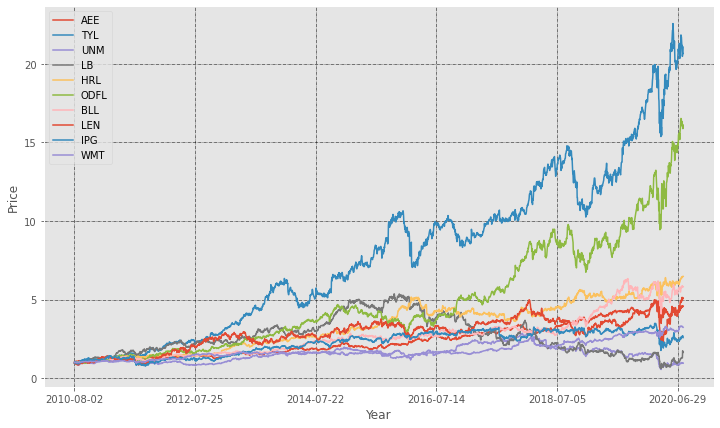

In [37]:
((df_new.pct_change()+1).cumprod()).plot(figsize=(12, 7))

plt.ylabel('Price')
plt.xlabel('Year')

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Методом `.hist()` постройте для этих цен гистограммы. Выберите количество бинов `bins` равное $25$, опцию `density` поставьте в `True`. Это отнормирует высоту столбиков так, чтобы сумма площадей под ними была равна единице. 

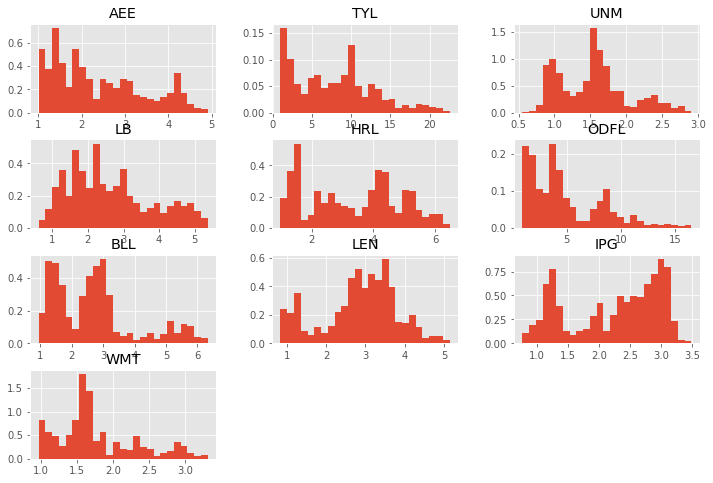

In [38]:
((df_new.pct_change()+1).cumprod()).hist(figsize=(12,8), bins=25, density=True)
plt.show()

Финансовые продукты характеризуются двумя основными характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [39]:
df_r =(df_prices.diff()/df_prices.shift(1))[1:]

In [40]:
df_r.head(3)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-03,-0.034004,0.001880,-0.015347,0.000306,NaN,-0.019621,-0.017905,0.003412,-0.008183,-0.016216,...,0.012593,0.008101,-0.017312,NaN,-0.015461,0.006688,-0.006887,-0.012232,NaN,NaN
2010-08-04,0.016164,-0.059099,0.014256,0.004009,NaN,0.012675,-0.042844,0.003600,0.008500,0.019918,...,0.000000,0.017036,0.009327,NaN,0.008698,0.011810,0.025183,0.000442,NaN,NaN
2010-08-05,0.006009,-0.038883,0.009558,-0.004868,NaN,-0.000659,-0.022857,-0.003986,-0.009172,-0.008754,...,-0.000159,-0.002844,-0.010267,NaN,0.015808,-0.006019,0.080456,-0.022547,NaN,NaN


In [41]:
# проверка, что задание решено корректно
assert df_r.iloc[0,0] < 1

# Подобные тесты скрыты от вас

Методом `.plot` постройте для выбранных ранее 10  случайных тикеров картинку с динамикой цены. 

In [42]:
df_new2 = pd.DataFrame()

In [43]:
for tick in tickers10:
    df_new2[tick] = df_r[tick]

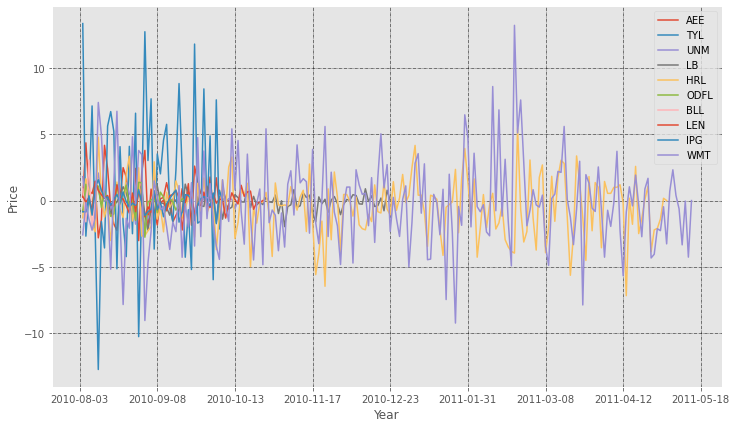

In [44]:
((df_new2.pct_change()+1).cumprod()).plot(figsize=(12, 7))

plt.ylabel('Price')
plt.xlabel('Year')

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Постройте для доходностей этих 10 бумаг ящики с усами. Для этого в опциях команды `plot` укажите `'kind'='box'`. 

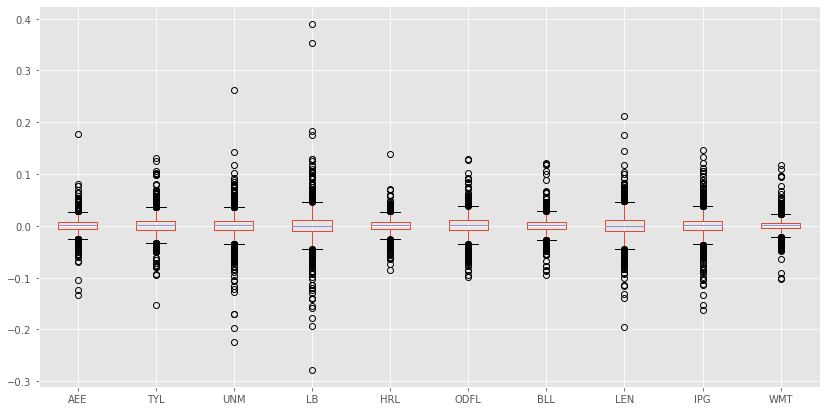

In [45]:
df_new2.plot(kind='box', figsize=(14, 7));

__Выводы:__ 

Доходности по нашим акциям имеют распределение похожее на нормальное, но есть отличие. По ящикам с усами видно, что в данных есть довольно большое количество выбросов. Это сигнализирует о том, что у распределения доходностей хвосты оказываются более тяжёлыми, чем у нормального распределения. То есть под ними сосредоточено больше вероятностной массы и из-за этого редкое события более вероятны, чем для нормального распределения. Такую особенность финансовых данных мы более подробно будем обсуждать в будущем. 

Кроме того, по построенным визуализациям видно, что средние доходности практически для всех ценных бумаг находится близко к нулю.

__ё)__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Посчитайте для всех компаний среднюю доходность. Найдите 10 самых доходных компаний и 10 самых убыточных. 

In [46]:
R  = list(df_r.describe()[1:2].iloc[0])  # средние доходности 
rtop_10 = list(df_r.describe()[1:2].sort_values('mean', axis=1, ascending=False).columns[:10]) # list из тикеров 10 самых доходных компаний отсортированный по алфавиту
rbottom_10 = list(df_r.describe()[1:2].sort_values('mean', axis=1).columns[:10]) # list из тикеров 10 самых убыточных компаний отсортированный по алфавиту

In [47]:
rtop_10

['TT', 'CARR', 'ZM', 'MRNA', 'OTIS', 'DOCU', 'HWM', 'PAYC', 'TSLA', 'DXCM']

In [48]:
rbottom_10

['VIAC', 'UA', 'FOX', 'FOXA', 'COTY', 'DVN', 'KHC', 'WRK', 'SLB', 'APA']

In [49]:
# проверка, что задание решено корректно
assert 'DXCM' in rtop_10
assert 'SLB' in rbottom_10

# Подобные тесты скрыты от вас

Есть ли среди самых доходных компаний Тесла? :)

*Ответ* : Да!

__ж)__ Мы поговорили о доходности. Теперь поговорим о риске. Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. 

Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых. 

In [54]:
STD  = list(df_r.describe()[2:3].iloc[0]) # стандартные отклонения доходностей
stdtop_10 = sorted(list(df_r.describe()[2:3].sort_values('std', axis=1, ascending=False).columns)[:10]) # list из тикеров 10 самых рискованных компаний отсортированный по алфавиту
stdbottom_10 = sorted(list(df_r.describe()[2:3].sort_values('std', axis=1).columns)[:10])   # list из тикеров 10 самых нерискованных компаний отсортированный по алфавиту

In [55]:
stdtop_10

['AMD', 'CARR', 'DOW', 'HWM', 'MRNA', 'TSLA', 'TT', 'UA', 'VIAC', 'ZM']

In [56]:
stdbottom_10

['CL', 'DUK', 'GIS', 'JNJ', 'KMB', 'KO', 'PEP', 'PG', 'VZ', 'WM']

In [57]:
# проверка, что задание решено корректно
assert 'TSLA' in stdtop_10
assert 'PEP' in stdbottom_10

# Подобные тесты скрыты от вас

Есть ли среди самых рискованных компаний Тесла? :) 

*Ответ* : Есть!

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Построим для наших ценных бумаг диаграмму рассеивания, на которой будет видно где по своей доходности и риску находится какая ценная бумага. 

In [58]:
df_inf_new = pd.DataFrame()
df_inf_new['Symbol'] = list(df_inf['Symbol'])
df_inf_new['GICS Sector'] = list(df_inf.set_index('Symbol')['GICS_Sector'])
df_inf_new = df_inf_new.drop(index=[62])
df_inf_new = df_inf_new.drop(index=[74])
df_inf_new.head()

,Symbol,GICS Sector
0,A,Health Care
1,AAL,Industrials
2,AAP,Consumer Discretionary
3,AAPL,Information Technology
4,ABBV,Health Care


In [59]:
# таблица с доходностями и риском
data = pd.DataFrame({'std': STD, 'r': R})

# добавили сектора экономики для каждой из ценных бумаг
data['GICS Sector'] = list(df_inf_new['GICS Sector'])
data.head()

,std,r,GICS Sector
0,0.018245,0.000808,Health Care
1,0.032635,0.000549,Industrials
2,0.020001,0.000585,Consumer Discretionary
3,0.017418,0.001179,Information Technology
4,0.018026,0.000873,Health Care


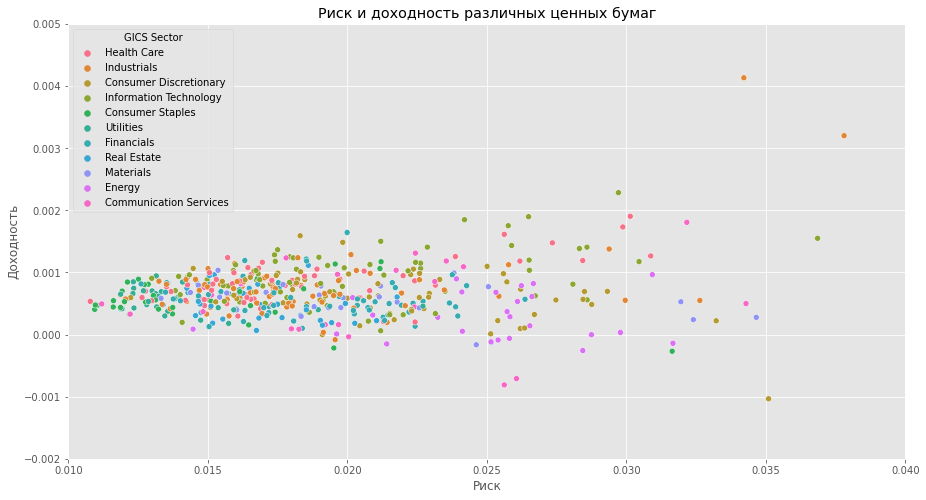

In [60]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='std', y='r', hue='GICS Sector')

plt.ylim(-0.002, 0.005)
plt.xlim(0.01, 0.04)

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Риск и доходность различных ценных бумаг');

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__

Сделайте группировку (`groupby`) для таблицы `data` по секторам экономики. Какой из секторов экономики обладает самым низким медианным значением риска? Самым высоким значением доходности?

In [61]:
data.groupby('GICS Sector').median()

,std,r
GICS Sector,,
Communication Services,0.019866,0.000547
Consumer Discretionary,0.020787,0.000663
Consumer Staples,0.013180,0.000527
Energy,0.025565,0.000282
Financials,0.018323,0.000543
Health Care,0.016737,0.000811
Industrials,0.017356,0.000686
Information Technology,0.019129,0.000905
Materials,0.019193,0.000597


In [62]:
df_agg = data.groupby('GICS Sector').median()  # таблица после группировки 
min_sector = 'Utilities'  # название сектора с минимальным медианным риском
max_sector = 'Information Technology'  # название сектора с максимальной доходностью 